# Deep Learning for Leaf Classification using Keras


We'll cover the following:
- Quiz and task on mnist data
- Feature extraction with CNN
- Activation & Loss Functions
- Optimizers comparison (SGD, Adam, RMSprop)      
- try to solve cifar10 problem using CNN
- Real World Example on Freshwater Fish Disease Aquaculture in south asia Dataset
- Baseline Dense model  
- Overfitting prevention: L1/L2, Dropout, Early Stopping  
- Evaluation: accuracy, confusion matrix, ROC curves  

# Quiz

## Multiple‑Choice Questions

1. **Which of the following problems highlighted the limitation of the single‑layer perceptron?**  
   - A. XOR  
   - B. OR  
   - C. AND  
   - D. NOR  

2. **Which loss function is best for classification tasks?**  
   - A. Mean Square Error  
   - B. Hinge loss  
   - C. Cross‑entropy  
   - D. Absolute error  

3. **Which type of gradient descent updates weights after seeing all data points?**  
   - A. SGD  
   - B. BGD  
   - C. MBGD  
   - D. RMSProp  
     

4. **What does the “softmax” function output?**  
   - A. A binary decision  
   - B. A vector summing to 1  
   - C. A hidden layer  
   - D. A constant    

---

## True / False Statements

5. Softmax activation is commonly used in regression problems. (True/False)  

# mnist task

In [4]:
# load mnist data


<details><summary>Click here for the solution</summary>

```python
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

```

</details>


5


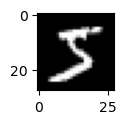

In [6]:
#import matplotlib.pyplot as plt
#print(y_train[0])
#plt.figure(figsize=(1,1))
#plt.imshow(x_train[0],cmap="gray")

In [8]:
# normalizes the image so that all pixel values fall within the [0, 1] range


<details><summary>Click here for the solution</summary>

```python
x_train = x_train/255
x_test = x_test/255

```

</details>


In [10]:
# reshape data to be one vector 784 pixel instead of 28*28


<details><summary>Click here for the solution</summary>

```python
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)
```

</details>


In [26]:
# build MLP model 
#from keras.models import Sequential
#from keras.layers import Input,Dense,Dropout,Conv2D,Flatten,MaxPool2D


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 196)            │        77,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 98)             │        19,306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 49)             │         4,851 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,405 (1.56 MB)

 Trainable params: 409,405 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

<details><summary>Click here for the solution</summary>

```python
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()
```

</details>


In [24]:
# compile model use loss SparseCategoricalCrossentropy and adam optimizer and metrics accuracy


<details><summary>Click here for the solution</summary>

```python
model.compile(loss="SparseCategoricalCrossentropy",optimizer="adam",metrics=["accuracy"])
```

</details>


In [26]:
# train the model using x_train and y_train on 10 epoch take 0.2 validation data and batch size 32


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8319 - loss: 0.5705 - val_accuracy: 0.9519 - val_loss: 0.1712
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9550 - loss: 0.1540 - val_accuracy: 0.9586 - val_loss: 0.1357
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9663 - loss: 0.1133 - val_accuracy: 0.9608 - val_loss: 0.1329
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9755 - loss: 0.0828 - val_accuracy: 0.9664 - val_loss: 0.1134
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9796 - loss: 0.0667 - val_accuracy: 0.9635 - val_loss: 0.1313
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9833 - loss: 0.0565 - val_accuracy: 0.9664 - val_loss: 0.1193
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9855 - loss: 0.0444 - val_accuracy: 0.9709 - val_loss: 0.1101
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9875 - loss: 

<details><summary>Click here for the solution</summary>

```python
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=32)
```

</details>


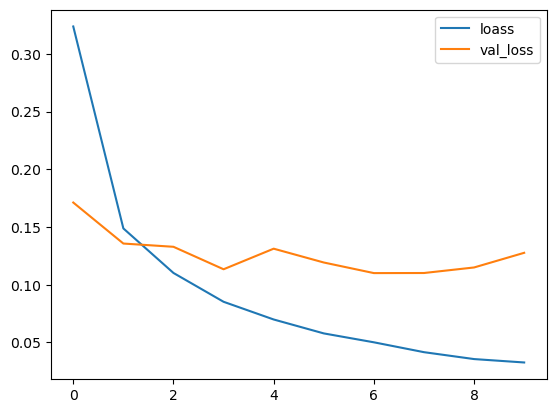

In [49]:
#plt.plot(history.history["loss"])
#plt.plot(history.history["val_loss"])
#plt.legend(["loss","val_loss"])


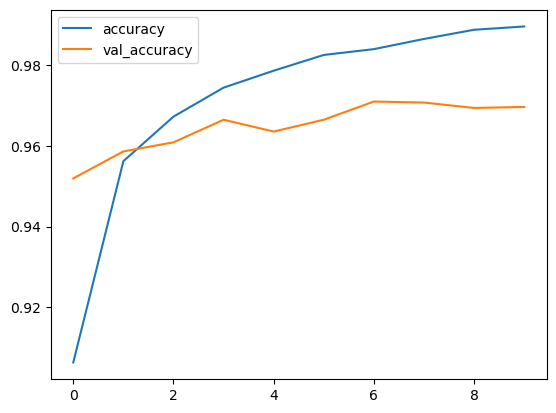

In [43]:
#plt.plot(history.history["accuracy"])
#plt.plot(history.history["val_accuracy"])
#plt.legend(["accuracy","val_accuracy"])

#plt.show()

In [53]:
# evaluate on test data


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9654 - loss: 0.1300


[0.11577158421278, 0.9696000218391418]

<details><summary>Click here for the solution</summary>

```python
model.evaluate(x_test,y_test)
```

</details>


# Convolutional Neural Networks (CNN)


###  What is a CNN?

A **Convolutional Neural Network** is designed to detect spatial patterns in image data using filters (kernels).  
CNNs are powerful for image classification, object detection, etc.

---
# How to Build a CNN Model – Step-by-Step

Designing a Convolutional Neural Network (CNN) follows a modular approach.  
Here's a general process that you can apply to most image or spatial-feature datasets:

---

### Step-by-Step CNN Design:

1. **Input Layer**  
   - Match the shape of your input images (e.g. `input_shape=(height, width, channels)`)

2. **Convolutional Layers (Conv2D)**  
   - Apply filters/kernels to extract local patterns  
   - Common sizes: `(3x3)`, `(5x5)`  
   - Add **ReLU activation** for non-linearity

3. **Pooling Layers (MaxPooling2D)**  
   - Downsample feature maps to reduce dimensionality  
   - Common pool size: `(2x2)`

4. **Additional Conv + Pool Layers** (optional)  
   - Stack deeper to extract higher-level features

5. **Flatten Layer**  
   - Convert 2D feature maps into a 1D vector for the dense layers

6. **Dense (Fully Connected) Layers**  
   - Classifier portion of the network  
   - Add `Dense(units)` layers with activations like `relu`, `softmax`

7. **Regularization (Dropout/L2)**  
   - Add `Dropout()` layers to reduce overfitting  
   - Use `kernel_regularizer=l2()` in dense/conv layers for weight constraints

8. **Output Layer**  
   - One neuron per class  
   - Use `softmax` activation for multi-class classification

9. **Compile the Model**  
   - Loss: `categorical_crossentropy`  
   - Optimizer: `adam`, `sgd`, etc.  
   - Metrics: `accuracy`

10. **Train the Model**  
   - Use `.fit()` with training data  
   - Include `validation_data` and callbacks like `EarlyStopping`

---

> ✅ Tip: Always visualize performance with accuracy/loss plots, confusion matrix, and classification reports.

# solve cifar10 problem

#### load data

In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### CNN Model

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Input,Conv2D,MaxPool2D,Flatten,Dropout
cnn_model = Sequential()
cnn_model.add(Input(shape=(32, 32, 3)))
cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(MaxPool2D(2, 2))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPool2D(2, 2))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,042 (2.33 MB)

 Trainable params: 612,042 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
cnn_model.compile(optimizer="adam",loss="SparseCategoricalCrossentropy",metrics=["accuracy"])

In [17]:
cnn_model.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.2928 - loss: 2.4031 - val_accuracy: 0.4232 - val_loss: 1.6053
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4307 - loss: 1.5800 - val_accuracy: 0.4929 - val_loss: 1.4104
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5002 - loss: 1.4062 - val_accuracy: 0.5440 - val_loss: 1.3136
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5453 - loss: 1.2941 - val_accuracy: 0.5861 - val_loss: 1.1853
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5827 - loss: 1.1876 - val_accuracy: 0.5900 - val_loss: 1.1760
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6119 - loss: 1.1087 - val_accuracy: 0.6053 - val_loss: 1.1630
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6417 - loss: 1.0302 - val_accuracy: 0.6268 - val_loss: 1.0761
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6611 - loss: 0.9780 - 

In [18]:
cnn_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6325 - loss: 1.1177


[1.1177356243133545, 0.6324999928474426]

# Real World Example in Freshwater Fish Disease Aquaculture in south asia Dataset

## 1. Constants

In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3
EPOCHS = 50
PATH = r'E:\BFCAI\2025 first term\BNU 2025\deep learning\my labs\lab 2\Freshwater Fish Disease Aquaculture in south asia'

## 2. load data in dataframe

In [8]:
import os
import pandas as pd
from tqdm import tqdm

# 1. تحديد المسار الصحيح الذي يحتوي على مجلدي Train و Test
# هذا هو المسار الذي يجب أن تستخدمه بناءً على هيكل مجلدات Kaggle
base_path = '/kaggle/input/freshwater-fish-disease-aquaculture-in-south-asia/Freshwater Fish Disease Aquaculture in south asia'

# 2. تهيئة القوائم الأربعة التي ستخزن البيانات
image_paths_train = []
image_class_train = []
image_paths_test = []
image_class_test = []

# 3. المرور على المجلدات الرئيسية (Train و Test)
# os.listdir(base_path) سوف تُرجع ['Test', 'Train', 'Train.csv']
for folder_name in tqdm(os.listdir(base_path)):

    # التأكد من أننا نتعامل مع مجلد وليس ملفًا مثل 'Train.csv'
    if not os.path.isdir(os.path.join(base_path, folder_name)):
        continue

    # بناء المسار الكامل لمجلد Train أو Test
    current_folder_path = os.path.join(base_path, folder_name)

    # المرور على مجلدات الفئات داخل Train أو Test
    for class_name in os.listdir(current_folder_path):
        class_folder_path = os.path.join(current_folder_path, class_name)

        # المرور على كل صورة داخل مجلد الفئة
        for image_name in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_name)

            # 4. إضافة مسار الصورة واسم الفئة إلى القائمة الصحيحة
            if folder_name == 'Train':
                image_paths_train.append(image_path)
                image_class_train.append(class_name)
            elif folder_name == 'Test':
                image_paths_test.append(image_path)
                image_class_test.append(class_name)

# 5. إنشاء إطارات البيانات (DataFrames) بنفس الشكل الذي طلبته
df_train = pd.DataFrame({'image_path': image_paths_train, 'label': image_class_train})
df_test = pd.DataFrame({'image_path': image_paths_test, 'label': image_class_test})

# 6. حفظ إطارات البيانات إلى ملفات CSV
# index=False مهم لعدم إضافة عمود إضافي للفهرس في ملف الـ CSV
df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

# 7. عرض أول 5 صفوف من إطار بيانات التدريب للتأكد من صحة البيانات
print("--- Training DataFrame ---")
print(df_train.head())

print("\n--- Testing DataFrame ---")
df_test.head()

print(f"\nNumber of training images: {len(df_train)}")
print(f"Number of testing images: {len(df_test)}")



100%|██████████| 3/3 [00:00<00:00, 11.80it/s]

--- Training DataFrame ---
                                          image_path               label
0  /kaggle/input/freshwater-fish-disease-aquacult...  Parasitic diseases
1  /kaggle/input/freshwater-fish-disease-aquacult...  Parasitic diseases
2  /kaggle/input/freshwater-fish-disease-aquacult...  Parasitic diseases
3  /kaggle/input/freshwater-fish-disease-aquacult...  Parasitic diseases
4  /kaggle/input/freshwater-fish-disease-aquacult...  Parasitic diseases

--- Testing DataFrame ---

Number of training images: 1750
Number of testing images: 700


In [9]:
import pandas as pd
df_train = pd.DataFrame({"image_path":image_paths_train,"label":image_class_train})
df_test = pd.DataFrame({"image_path":image_paths_test,"label":image_class_test})
df_train.to_csv("df_train.csv")
df_test.to_csv("df_test.csv")
df_train.head()

,image_path,label
0,/kaggle/input/freshwater-fish-disease-aquacult...,Parasitic diseases
1,/kaggle/input/freshwater-fish-disease-aquacult...,Parasitic diseases
2,/kaggle/input/freshwater-fish-disease-aquacult...,Parasitic diseases
3,/kaggle/input/freshwater-fish-disease-aquacult...,Parasitic diseases
4,/kaggle/input/freshwater-fish-disease-aquacult...,Parasitic diseases


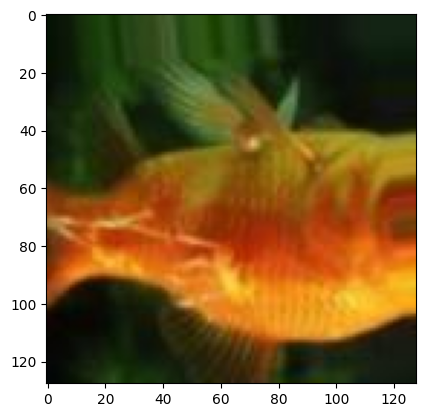

In [10]:
import matplotlib.pyplot as plt
im = plt.imread(df_train["image_path"][0])
plt.imshow(im)

In [11]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=42)

## 3. Importing data into a ImageDataGenerator dataset object

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_test = ImageDataGenerator(rescale=1./255)  # normalize pixels to [0,1]
datagen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')  # normalize pixels to [0,1]
train_generator = datagen_train.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical'  # or 'binary', 'sparse' depending on label format
)

Found 1398 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
valid_generator = datagen_test.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical'  # or 'binary', 'sparse' depending on label format
)

Found 349 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [14]:
test_generator = datagen_test.flow_from_dataframe(
    dataframe=df_test,
    x_col='image_path',
    y_col='label',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical'  # or 'binary', 'sparse' depending on label format
)

Found 697 validated image filenames belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


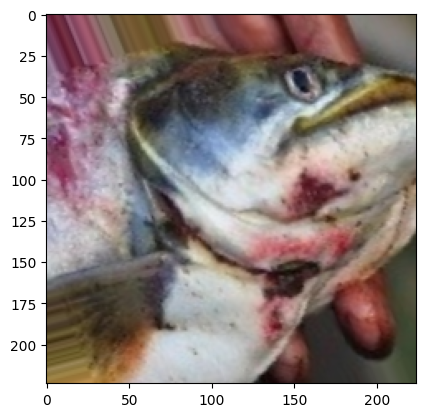

In [15]:
# 10 is batch number, 0 mean images and 31 is image number can not exceed 31
plt.imshow(train_generator[10][0][31])

In [16]:
# 10 is batch number, 1 mean classes and 31 is image class number can not exceed 31
train_generator[1][1][31]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [17]:
class_names = list(train_generator.class_indices.keys())

## Visualizing the first batch of images 

/tmp/ipykernel_37/3755174734.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


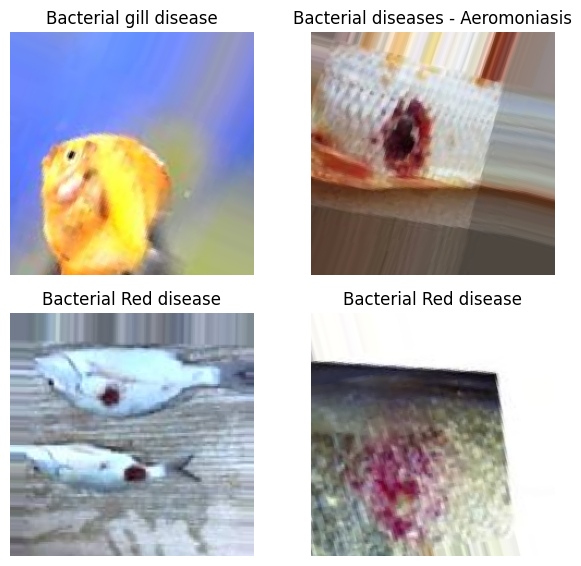

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(train_generator[0][0][i])
    plt.title(class_names[(train_generator[0][1][i]).argmax()])
    plt.tight_layout()
    plt.axis("off")

##  4. Build and Train CNN

We build a simple CNN with two convolutional layers, followed by dense layers and a softmax output.
This model will serve as a baseline for comparing with more complex models.


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input

In [20]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(7, activation='softmax'))
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,797,191 (182.33 MB)

 Trainable params: 47,797,191 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(train_generator, validation_data=valid_generator, epochs=3)

Epoch 1/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 559ms/step - accuracy: 0.2143 - loss: 1.8770 - val_accuracy: 0.2464 - val_loss: 1.8576
Epoch 2/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 376ms/step - accuracy: 0.2839 - loss: 1.8254 - val_accuracy: 0.3524 - val_loss: 1.6527
Epoch 3/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 375ms/step - accuracy: 0.3257 - loss: 1.7281 - val_accuracy: 0.3582 - val_loss: 1.6617


In [23]:
cnn_model.evaluate(test_generator)

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - accuracy: 0.5120 - loss: 1.4432


[1.5228372812271118, 0.42898133397102356]

### How to Reduce Overfitting
We will use:

1- Dropout Layers – randomly deactivate neurons

2- L1/L2 Regularization – penalize large weights

3- Early Stopping – stop training when val loss stops improving

In [27]:
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu',kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(128, activation='relu',kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(64, activation='relu',kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
cnn_model.add(Dense(7, activation='softmax'))
cnn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,836,999 (182.48 MB)

 Trainable params: 47,836,999 (182.48 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [30]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(train_generator, validation_data=valid_generator, epochs=3,callbacks=[early_stop])

Epoch 1/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 464ms/step - accuracy: 0.1754 - loss: 3.2776 - val_accuracy: 0.2063 - val_loss: 2.5271
Epoch 2/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 378ms/step - accuracy: 0.2308 - loss: 2.4131 - val_accuracy: 0.2980 - val_loss: 2.1786
Epoch 3/3
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 391ms/step - accuracy: 0.2956 - loss: 2.1362 - val_accuracy: 0.3668 - val_loss: 2.0723


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step


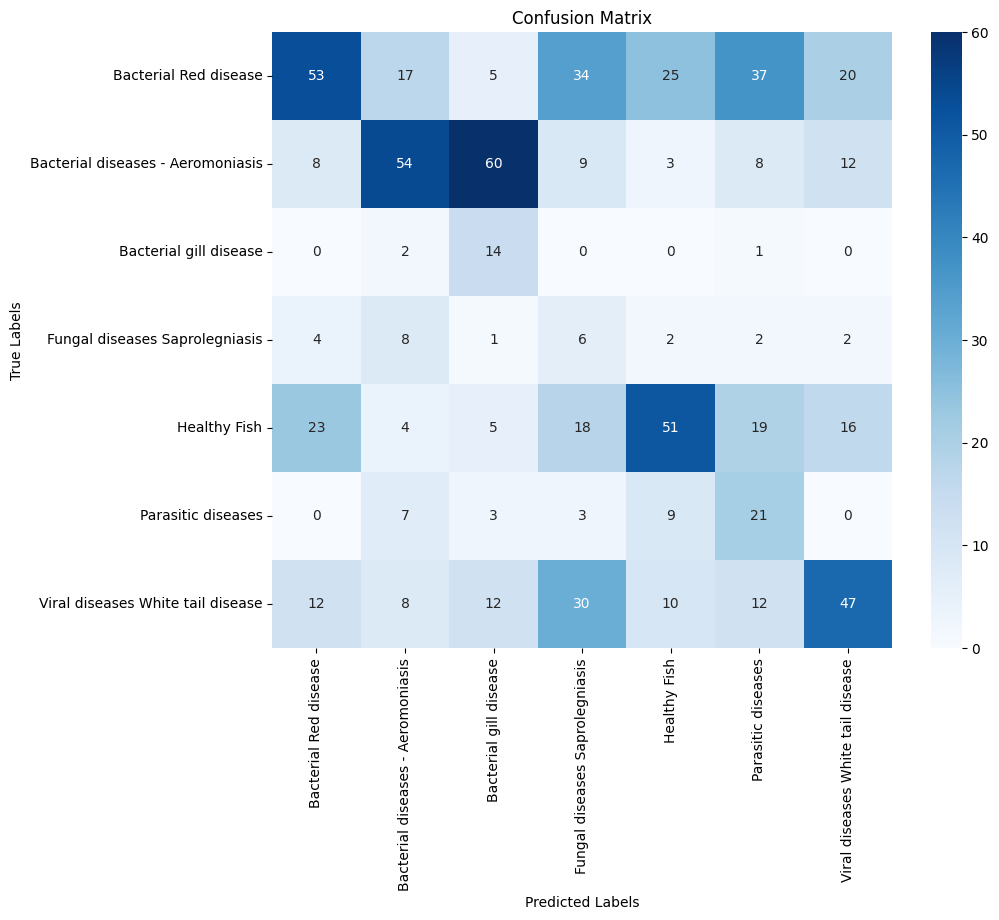

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred_probs = cnn_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
conf_matrix = confusion_matrix(y_pred, test_generator.classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig('Confusion Matrix.png', dpi = 300)
plt.show()

In [45]:
cnn_model.save("mobile_net_fish.h5")

In [46]:
import keras
load_model = keras.models.load_model(r"/kaggle/working/mobile_net_fish.h5")
# Recompile it (use same loss & metrics as in training)
load_model.evaluate(test_generator)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.2750 - loss: 2.0346


[2.0086777210235596, 0.3529411852359772]

### predict one image

In [50]:
import cv2
import tensorflow as tf
import numpy as np
img = cv2.imread(r'/kaggle/input/freshwater-fish-disease-aquaculture-in-south-asia/Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).jpeg')
img = cv2.resize(img,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_arr = tf.keras.preprocessing.image.img_to_array(gray)
input_arr = np.array([input_arr]) 
input_arr = input_arr.astype('float32') / 255.  
predictions = load_model.predict(input_arr)
print(np.argmax(predictions,axis=1)   ,predictions)
print(np.argmax(predictions,axis=1)   ,predictions[0]*100)
print(np.argmax(predictions,axis=1)   ,predictions[0][1]*100)
print("belong to : ",class_names[np.argmax(predictions,axis=1)[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[0] [[0.22502269 0.07477038 0.07437319 0.14905603 0.1880803  0.15306331
  0.13563421]]
[0] [22.50227    7.4770374  7.437319  14.905603  18.80803   15.306332
 13.563421 ]
[0] 7.477037608623505
belong to :  Bacterial Red disease


In [51]:
predictions[0]

array([0.22502269, 0.07477038, 0.07437319, 0.14905603, 0.1880803 ,
       0.15306331, 0.13563421], dtype=float32)

# HOW TO DECIDE WHICH NUMBER OF LAYERS AND NUMBER OF NUROUNS IS THERE EXIST BUILTED MODEL TO USE DIRECTLY???